# Preparación del entorno

In [36]:
#Importamos librerías

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import numpy as np
import plotly.express as px

In [37]:
#Cargamos el CSV de Ventas de Autos Usados

df = pd.read_csv("/content/Venta_de_autos_usados.csv")

# Exploracion

a) Mostrar las primeras 5 filas del DataFrame.


In [38]:
df.head(5)

,edad_vendedor,edad_auto,km_recorridos,reparaciones,tipo,precio
0,23,2.17,25142.768002,24,0,4077
1,26,18.92,120164.547502,17,0,2804
2,35,24.90,90244.499657,13,0,4432
3,34,1.93,15384.326615,18,0,5340
4,67,6.88,32319.146178,19,0,4053


 b) Mostrar los tipos de datos de cada columna.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   edad_vendedor  1000 non-null   int64  
 1   edad_auto      1000 non-null   float64
 2   km_recorridos  1000 non-null   float64
 3   reparaciones   1000 non-null   int64  
 4   tipo           1000 non-null   int64  
 5   precio         1000 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 47.0 KB


c) Calcular estadísticas descriptivas básicas (describe()).


In [40]:
df.describe()

,edad_vendedor,edad_auto,km_recorridos,reparaciones,tipo,precio
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,46.152000,20.59965,82377.836218,12.807000,0.187000,4354.076000
std,16.866576,11.28514,49873.724305,7.395569,0.390107,1960.881333
min,18.000000,1.00000,14738.735614,0.000000,0.000000,-1543.000000
25%,32.000000,10.72750,42881.726662,6.000000,0.000000,3048.000000
50%,46.000000,20.87500,70263.224727,13.000000,0.000000,4310.500000
75%,61.000000,30.29000,111688.819188,19.000000,0.000000,5758.250000
max,75.000000,39.99000,239619.058017,25.000000,1.000000,10523.000000


# Limpieza de datos

d) Eliminar las filas que tengan al menos un valor nulo

In [41]:
df = df.dropna()

# Visualizaciones

e) Usar Seaborn para:
- Scatterplot entre edad_auto y precio, coloreado por tipo
- Agregar línea de regresión (Regplot) para kms_recorridos vs. precio

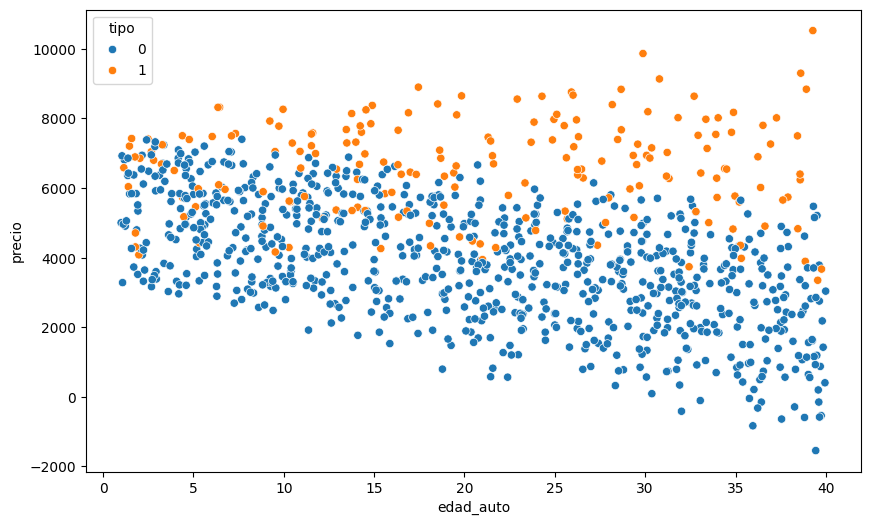

In [42]:
# Scatterplot entre edad_auto y precio, coloreado por tipo

x = 'edad_auto'
y = 'precio'

#Graficamos
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=x, y=y, hue='tipo') #Con hue coloreamos el tipo
plt.show()



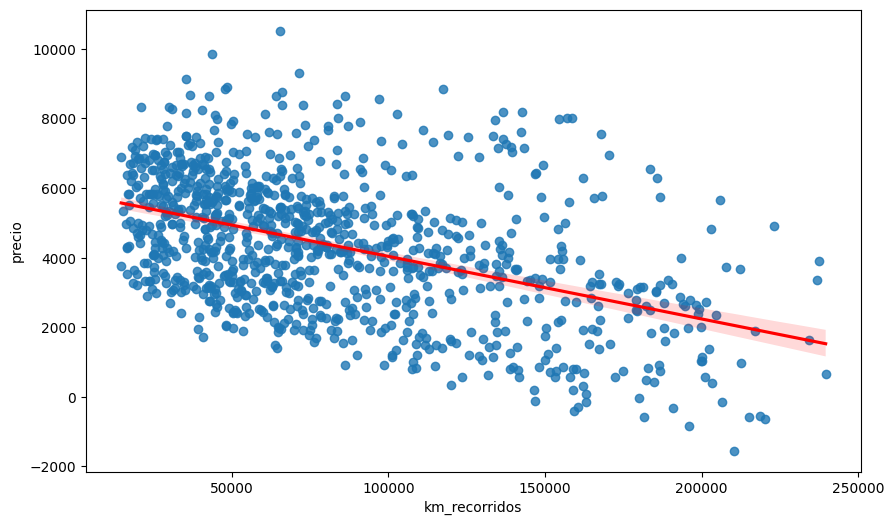

In [43]:
# Agregar línea de regresión (Regplot) para kms_recorridos vs. precio

x = 'km_recorridos'
y = 'precio'


plt.figure(figsize = (10, 6))
sns.regplot(x=x, y=y, data=df, line_kws= {'color': 'red'}) #en esta parte definimos la linea de regresion
plt.show()

  f) Usar plotly para:

  - Scatter interactivo entre edad_auto y precio con hover_data que muestre todas las variables
  - Scatter interactivo entre kms_recorridos y precio con puntos coloreados por tipo
  - En el subinciso 2, probar cambiar el tamaño de los puntos en función de edad_auto para ver patrones

In [44]:
# Scatter interactivo entre edad_auto y precio con hover_data que muestre todas las variables

x = 'edad_auto'
y = 'precio'


fig = px.scatter(df, x='edad_auto', y = 'precio', hover_data=df.columns)
fig.show()

In [45]:
# Scatter interactivo entre kms_recorridos y precio con puntos coloreados por tipo

x = 'km_recorridos'
y = 'precio'


fig = px.scatter(df, x='km_recorridos', y = 'precio', color = 'tipo')
fig.show()


In [46]:
# En el subinciso 2, probar cambiar el tamaño de los puntos en función de edad_auto para ver patrones

x = 'km_recorridos'
y = 'precio'


fig = px.scatter(df, x='km_recorridos', y = 'precio', color = 'tipo', size='edad_auto', hover_data=df.columns) #aca detallamos el cambio de tamaño en función a lo pedido
fig.show()



g) ¿Qué información adicional aporta un gráfico interactivo frente a uno
estático, cual biblioteca brinda el grafico intectactivo y cual el estatico?


Un gráfico interactivo permite ver información extra pasando el cursor por los puntos, hacer zoom y explorar mejor los datos, mientras que uno estático solo muestra la visualización fija. Esto ayuda a entender mejor los flujos de informacion.

Como pudimos observar a lo largo de ambos incisos de  este apartado, para interactivo usamos Plotly y para estático Seaborn.

# Correlaciones

h) Calcular correlación de Pearson y Spearman entre:


* edad_auto y precio.

correlacion Pearson -0.3969
p-value 0.0
correlacion Spearman -0.4101
p-value 0.0


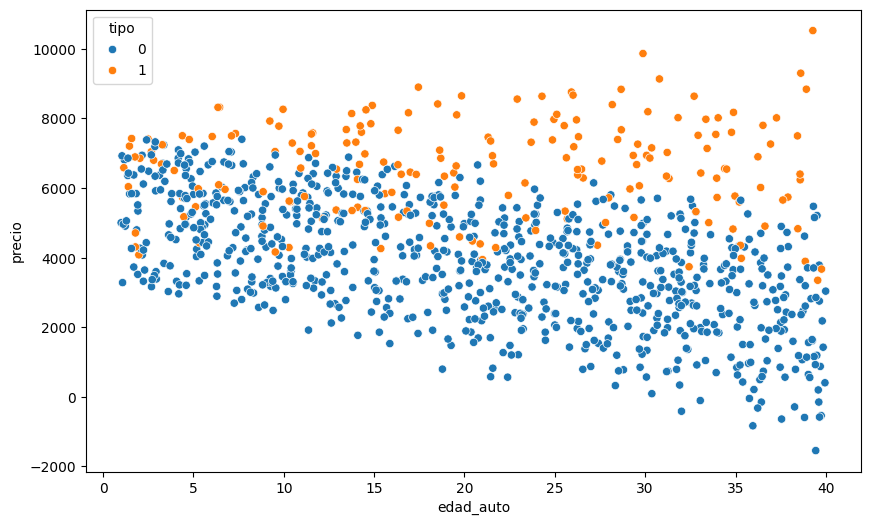

In [53]:
# Pearson

x = 'edad_auto'
y = 'precio'

r, p = pearsonr(df[x], df[y]) #calculamos la correlacion de Pearson
print('correlacion Pearson', np.round(r, 4)) #imprimimos la correlacion
print('p-value', np.round(p, 4)) #imprimimos el p-value


# Spearman
rs, ps = spearmanr(df[x], df[y]) #calculamos la correlacion de Spearman
print('correlacion Spearman', np.round(rs, 4)) #imprimimos la correlacion
print('p-value', np.round(ps, 4)) #imprimimos el p-value

plt.figure(figsize = (10, 6))
sns.scatterplot(x=x, y=y, data=df, hue = 'tipo')
plt.show()



- km_recorridos y precio.


correlacion Pearson -0.4573
p-value 0.0
correlacion Spearman -0.4382
p-value 0.0


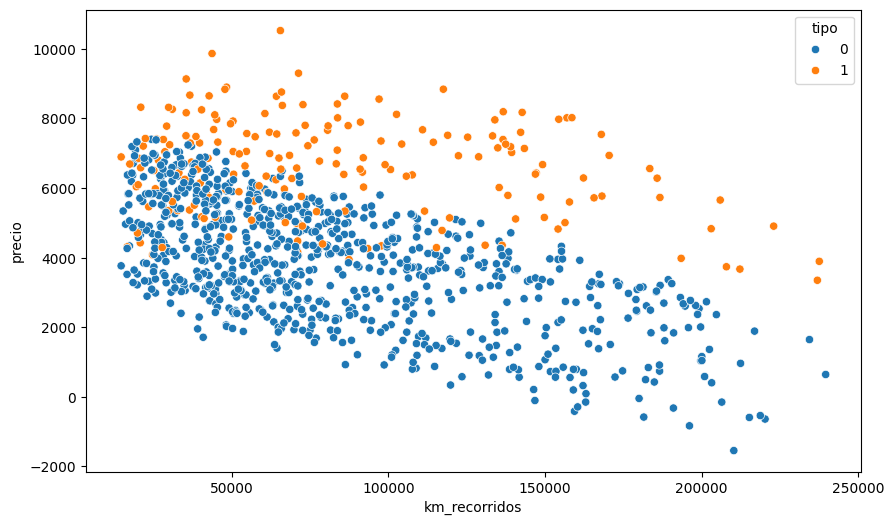

In [52]:
# Pearson

x = 'km_recorridos'
y = 'precio'

r, p = pearsonr(df[x], df[y]) #calculamos la correlacion de Pearson
print('correlacion Pearson', np.round(r, 4)) #imprimimos la correlacion
print('p-value', np.round(p, 4)) #imprimimos el p-value


# Spearman
rs, ps = spearmanr(df[x], df[y]) #calculamos la correlacion de Spearman
print('correlacion Spearman', np.round(rs, 4)) #imprimimos la correlacion
print('p-value', np.round(ps, 4)) #imprimimos el p-value

plt.figure(figsize = (10, 6))
sns.scatterplot(x=x, y=y, data=df, hue = 'tipo')
plt.show()

i) Para cada correlación, obtener también el p-value y explicar qué significa.

En el punto anterior se detallaron los resultados de los p-value obtenidos, que fueron 0.0 tanto en Pearson como en Spearman. Esto significa que la probabilidad de que la correlación observada se deba al azar es prácticamente nula. En consecuencia, podemos afirmar que la relación entre las variables es estadísticamente significativa.


j) Mostrar matriz de correlaciones de Pearson para todas las variables
numéricas con Seaborn heatmap.

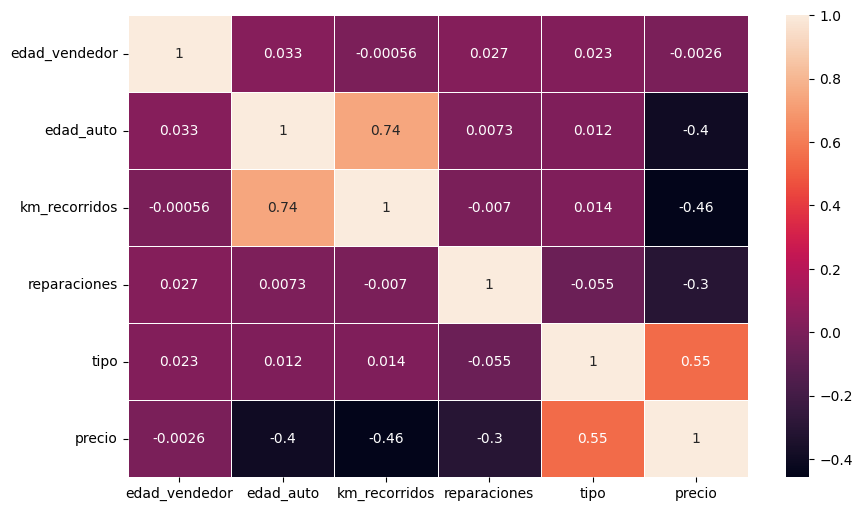

In [49]:
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax) #graficamos el heatmap con todas las variables
plt.show()

k) ¿Qué mide la correlación de Pearson y qué mide la de Spearman?

La correlacion de Pearson mide si dos variables estan relacionadas de forma lineal. Asume normalidad en los datos. Cuando sube una variable, la otra tiende a subir o bajar en una relacion recta.

La correlacion de Spearman mide si dos variables se mueven en la misma direccion de forma monotona, aunque no recta. No asume normalidad en los datos, es mas robusta frente a valores extremos.